# PDF Table Extraction using Camelot in Python

Camelot is an open-source Python library, that enables developers to extract all tables from the PDF document and convert it to Pandas Dataframe format: https://camelot-py.readthedocs.io/

**Installation**

1. Camelot has two dependencies [Ghostscript](https://www.ghostscript.com/) and [Tkinter](https://wiki.python.org/moin/TkInter) which must first be installed. The installation process differs depending on your operating system: https://camelot-py.readthedocs.io/en/master/user/install-deps.html#install-deps
2. Install Camelot: `pip install "camelot-py[cv]"` OR `conda install -c conda-forge camelot-py`.
3. Visual debugging using Camelot's `plot()` function requires matplotlib which is an optional dependency. You can install it using `pip install camelot-py[plot]` if matplotlib is not already included in your python development environment.

**Note:** Camelot only works with text-based PDFs, not scanned documents.

**Quickstart**

Useful quickstart guides can be found here:
- [Extract Tables from PDF file in a single line of Python Code](https://towardsdatascience.com/extract-tables-from-pdf-file-in-a-single-line-of-python-code-5b572cd9fbe5)
- [Extracting tabular data from PDFs made easy with Camelot.](https://towardsdatascience.com/extracting-tabular-data-from-pdfs-made-easy-with-camelot-80c13967cc88)

#### Import Packages

In [52]:
import camelot

#### Set input file path for PDFs

Files obtained from W3C examples:
- Example 1: [table](https://www.w3.org/WAI/WCAG20/Techniques/working-examples/PDF20/table.pdf)
- Example 2: [sample1](https://s16458.pcdn.co/wp-content/uploads/2017/01/sample1.pdf)

In [117]:
#input_filepath = "input_pdfs/table.pdf"
input_filepath = "input_pdfs/sample1.pdf"

## Read the pdf file

Camelot will only parse the first page if the pages parameter is not set. The pages parameter accepts comma separated numbers `'1,2,3,7'`, number ranges `'3-5'`, or a combinaton of the two `'1,3-5,7'`. Pages may contain multiple tables. All parsed tables will be extracted to a table list of 'n' length.

In [118]:
tables = camelot.read_pdf(input_filepath, pages='1')
tables

<TableList n=2>

#### Print table parsing report

In [119]:
tables[0].parsing_report

{'accuracy': 100.0, 'whitespace': 0.0, 'order': 1, 'page': 1}

#### Access the nth table  as dataframe

In [120]:
tables[0].df

,0,1,2,3,4,5
0,Date,Open,High,Low,Close / Last,Volume
1,01/04/2017,62.48,62.75,62.12,62.3,"21,325,140"
2,01/03/2017,62.79,62.84,62.125,62.58,"20,655,190"
3,12/30/2016,62.96,62.99,62.03,62.14,"25,575,720"
4,12/29/2016,62.86,63.2,62.73,62.9,"10,248,460"
5,12/28/2016,63.4,63.4,62.83,62.99,"14,348,340"
6,12/27/2016,63.21,64.07,63.21,63.28,"11,743,650"
7,12/23/2016,63.45,63.54,62.8,63.24,"12,399,540"
8,12/22/2016,63.84,64.1,63.405,63.55,"22,175,270"
9,12/21/2016,63.43,63.7,63.12,63.54,"17,084,370"


## Visual Debugging

Camelot's `plot()` method to generate a matplotlib plot of various elements that were detected on the PDF during processing. The following plot types are supported:
- ‘text’
- ‘grid’
- ‘contour’
- ‘line’
- ‘joint’
- ‘textedge’

Further information available here: https://camelot-py.readthedocs.io/en/master/user/advanced.html#visual-debugging

#### Plot the parsed regions of the PDF by kind

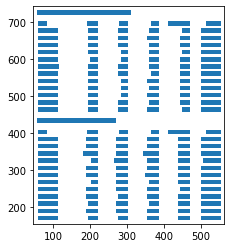

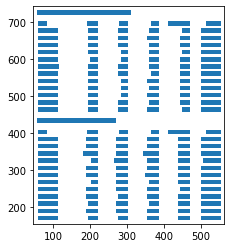

In [121]:
camelot.plot(tables[0], kind='text')

## Export Tables

In [122]:
output_filepath = 'output_tables/'
filename = 'output'
file_format = 'csv'

#### Export file

In [123]:
tables.export(output_filepath + filename + '.' + file_format, f=file_format)